<a href="https://colab.research.google.com/github/Jamyly-NMelo/Universo-Aluna-Fiap/blob/main/Quest%C3%A3odois.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
vendas_2019 = pd.read_csv('/content/vendas_linha_petshop_2019.csv',
    sep = ';',
    encoding ='latin1',
    decimal =',')

In [3]:
vendas_2020 = pd.read_csv('/content/vendas_linha_petshop_2020.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [4]:
vendas_2021 = pd.read_csv('/content/vendas_linha_petshop_2021.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [5]:
vendas_2022 = pd.read_csv('/content/vendas_linha_petshop_2022.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [6]:
#Concatenar as 4 tabelas
vendas = pd.concat([vendas_2019, vendas_2020, vendas_2021, vendas_2022], ignore_index=True)
vendas

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.00,2.0,42.00,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,3,Norte,Biscoito True Champion 300g,22.00,NaN,44.00,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,4,Norte,Biscoito True Champion 300g,19.00,4.0,88.00,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200781,200976,Sudeste,Bandana Disney Mickey Fábrica Petti,19.44,3.0,58.32,07/02/2022,Rio de Janeiro,Cartão Débito,Papa Léguas,Antonio,0.42,14.7,Acessório
200782,200977,Sudeste,Bandana Disney Mickey Fábrica Petti,21.06,1.0,21.06,06/02/2022,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,0.26,9.1,Acessório
200783,200978,Sul,Bandana Disney Mickey Fábrica Petti,14.58,3.0,43.74,25/01/2022,Paraná,Cartão Crédito,Tree True,Beatriz,0.48,16.8,Acessório
200784,200979,Sul,Bandana Disney Mickey Fábrica Petti,16.20,2.0,32.40,27/03/2022,Santa Catarina,Pix,Tree True,Vitória,0.52,18.2,Acessório


In [7]:
print(vendas.columns)


Index(['cod_pedido', 'regiao_pais', 'produto', 'valor', 'quantidade',
       'valor_total_bruto', 'data', 'estado', 'formapagto',
       'centro_distribuicao', 'responsavelpedido', 'valor_comissao',
       'lucro_liquido', 'categoriaprod'],
      dtype='object')


In [8]:
vendas.columns = vendas.columns.str.strip()


# Calcula a média de preço da população para cada ano


In [9]:
media_preco_populacao_2019 = vendas_2019['valor'].mean()
print(media_preco_populacao_2019)


87.63387228287891


In [10]:
media_preco_populacao_2020 = vendas_2020['valor'].mean()
print(media_preco_populacao_2020)

97.9981105631975


In [11]:
media_preco_populacao_2021 = vendas_2021['valor'].mean()
print(media_preco_populacao_2021)


116.75660315111769


In [12]:
media_preco_populacao_2022 = vendas_2022['valor'].mean()
print(media_preco_populacao_2022)


141.87574285714285


In [14]:
print(media_preco_populacao_2019)
print(media_preco_populacao_2020)
print(media_preco_populacao_2021)
print(media_preco_populacao_2022)

87.63387228287891
97.9981105631975
116.75660315111769
141.87574285714285


# Calcula a média de preço para cada região

In [15]:
media_preco_regiao_2019 = vendas_2019.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2019)

regiao_pais
Centro Oeste    87.757116
Nordeste        87.534934
Norte           87.702111
Sudeste         87.691986
Sul             87.411540
Name: valor, dtype: float64


In [16]:
media_preco_regiao_2020 = vendas_2020.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2020)

regiao_pais
Centro Oeste    98.081498
Nordeste        97.966138
Norte           98.133558
Sudeste         97.937989
Sul             97.735413
Name: valor, dtype: float64


In [17]:
media_preco_regiao_2021 = vendas_2021.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2021)

regiao_pais
Centro Oeste    116.768680
Nordeste        116.853671
Norte           116.469430
Sudeste         117.006368
Sul             116.799833
Name: valor, dtype: float64


In [18]:
media_preco_regiao_2022 = vendas_2022.groupby('regiao_pais')['valor'].mean()
print(media_preco_regiao_2022)

regiao_pais
Centro Oeste    142.226317
Nordeste        141.963616
Norte           141.996811
Sudeste         141.589929
Sul             141.426429
Name: valor, dtype: float64


In [19]:
media_preco_regiao = pd.concat([media_preco_regiao_2019, media_preco_regiao_2020, media_preco_regiao_2021, media_preco_regiao_2022], axis=1)
print(media_preco_regiao)

                  valor      valor       valor       valor
regiao_pais                                               
Centro Oeste  87.757116  98.081498  116.768680  142.226317
Nordeste      87.534934  97.966138  116.853671  141.963616
Norte         87.702111  98.133558  116.469430  141.996811
Sudeste       87.691986  97.937989  117.006368  141.589929
Sul           87.411540  97.735413  116.799833  141.426429


#Média de preço de alguma modalidade de pagamento e à média da população

In [26]:
vendas['data'] = pd.to_datetime(vendas['data'])

In [23]:
vendas['ano'] = vendas['data'].dt.year

In [24]:
media_preco_forma_pagamento = vendas.groupby(['ano', 'formapagto'])['valor'].mean()


In [25]:
print(media_preco_forma_pagamento)


ano   formapagto     
2019  Boleto Bancário     87.761350
      Cartão Crédito      86.224092
      Cartão Débito       87.985218
      Dinheiro            88.803202
      Pix                 87.445296
2020  Boleto Bancário     99.249975
      Cartão Crédito      97.923725
      Cartão Débito       94.577728
      Dinheiro           100.916170
      Pix                 97.364406
2021  Boleto Bancário    116.066067
      Cartão Crédito     118.734018
      Cartão Débito      116.711709
      Dinheiro           115.719205
      Pix                116.545924
2022  Boleto Bancário    139.421762
      Cartão Crédito     147.046044
      Cartão Débito      139.784489
      Dinheiro           139.661669
      Pix                143.368393
Name: valor, dtype: float64


Analise

NameError: name 'outliers' is not defined

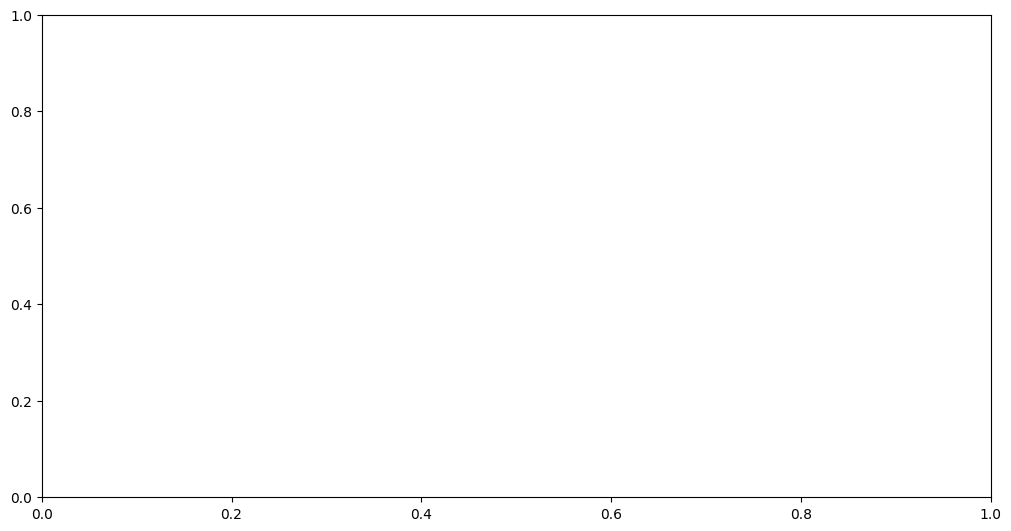

In [20]:
#REFAZER ESSE GRAFICO - FICOU MUITO RUIM A ANALISE
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cod_pedido']
  ys = series['valor']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = outliers.sort_values('cod_pedido', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('formapagto')):
  _plot_series(series, series_name, i)
  fig.legend(title='formapagto', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cod_pedido')
_ = plt.ylabel('valor')